In [1]:
from datasets import load_from_disk

ds_textiles = load_from_disk('../Textiles_patents')

/Users/nevidujayatilleke/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/nevidujayatilleke/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import numpy as np
import pandas as pd
import nltk
from tqdm import tqdm
nltk.download('punkt') # one time execution
import re
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nevidujayatilleke/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df_train = pd.DataFrame(ds_textiles['train'])

In [4]:
df_train.head()

,description,abstract
0,BACKGROUND OF THE INVENTION \n This invent...,A method of forming fiber mixtures from differ...
1,CROSS-REFERENCE TO RELATED APPLICATION \n ...,The fibers of recycled paper are cleaned by ag...
2,This is a division of application Ser. No. 922...,"Non-woven, bias laid fabrics, where the variou..."
3,FIELD OF THE INVENTION \n The present inve...,Multiple-color air jet looms successively inse...
4,[0001] This application claims the benefit...,A method of performing a spinning operation of...


In [5]:
# Function to count words in a text
def count_words(text):
    return len(text.split())

In [6]:
df_train['description_word_count'] = df_train['description'].apply(count_words)


In [7]:
df_train['description_word_count'].head()

0    3995
1    2712
2    6372
3    3885
4    3502
Name: description_word_count, dtype: int64

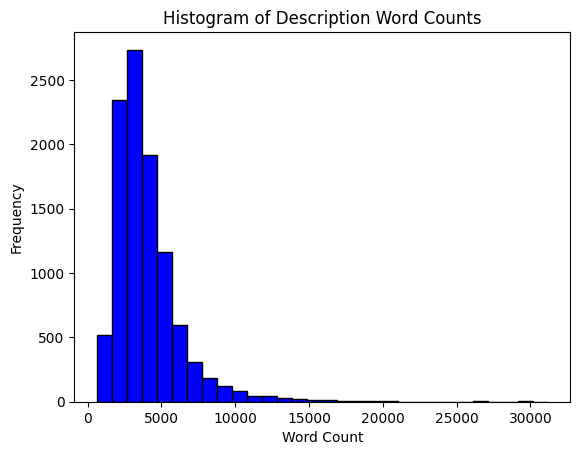

In [8]:
plt.hist(df_train['description_word_count'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Description Word Counts')
plt.show()

In [9]:
df_train['description_word_count'].describe()

count    10164.000000
mean      3997.096812
std       2316.219901
min        627.000000
25%       2550.000000
50%       3476.000000
75%       4791.000000
max      31189.000000
Name: description_word_count, dtype: float64

In [10]:
df_train['abstract_word_count'] = df_train['abstract'].apply(count_words)

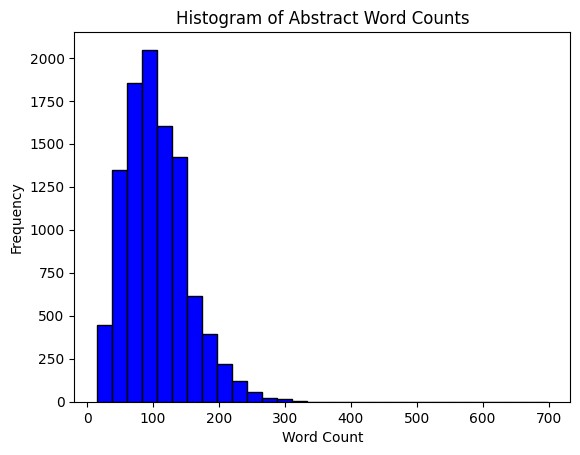

In [11]:
plt.hist(df_train['abstract_word_count'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Abstract Word Counts')
plt.show()

In [12]:
df_train['abstract_word_count'].describe()

count    10164.000000
mean       105.055884
std         47.508827
min         15.000000
25%         70.000000
50%         99.000000
75%        133.000000
max        699.000000
Name: abstract_word_count, dtype: float64

In [13]:
df_train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10164 entries, 0 to 10163
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   description             10164 non-null  object
 1   abstract                10164 non-null  object
 2   description_word_count  10164 non-null  int64 
 3   abstract_word_count     10164 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 317.8+ KB


In [15]:
from statsmodels.distributions.empirical_distribution import ECDF

In [16]:
ecdf1 = ECDF(df_train['description_word_count'])

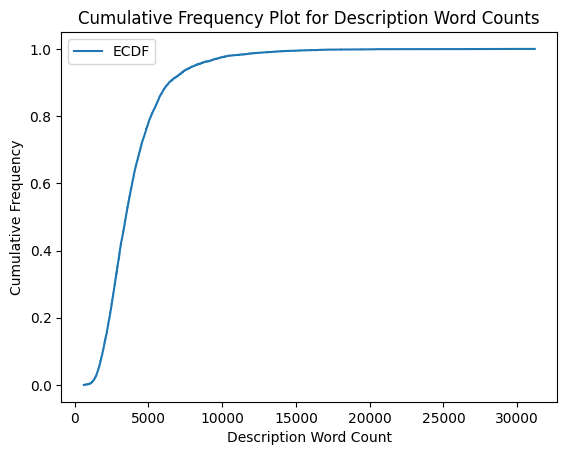

In [17]:
plt.step(ecdf1.x, ecdf1.y, label='ECDF')
plt.xlabel('Description Word Count')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Frequency Plot for Description Word Counts')
plt.legend()
plt.show()

In [18]:
ecdf2 = ECDF(df_train['abstract_word_count'])

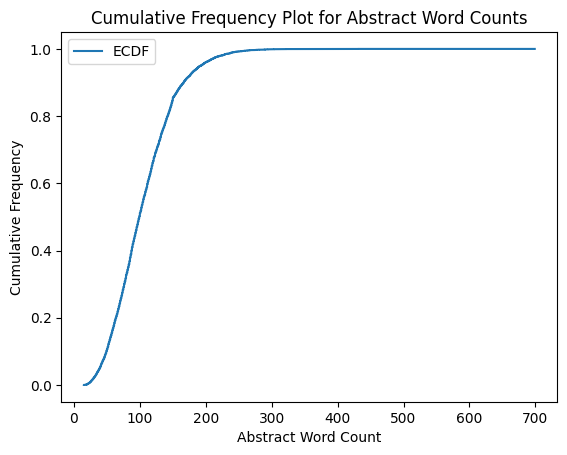

In [19]:
plt.step(ecdf2.x, ecdf2.y, label='ECDF')
plt.xlabel('Abstract Word Count')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Frequency Plot for Abstract Word Counts')
plt.legend()
plt.show()

In [20]:
from nltk.tokenize import sent_tokenize

In [21]:
# Function to count sentences in a text
def count_sents(text):
    sentences = sent_tokenize(text)
    return len(sentences)

In [22]:
df_train['description_sent_count'] = df_train['description'].apply(count_sents)
df_train['abstract_sent_count'] = df_train['abstract'].apply(count_sents)

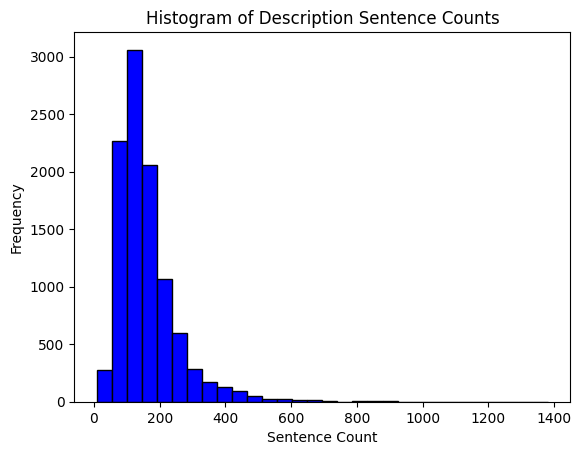

In [23]:
plt.hist(df_train['description_sent_count'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')
plt.title('Histogram of Description Sentence Counts')
plt.show()

In [24]:
df_train['description_sent_count'].describe()

count    10164.000000
mean       160.322412
std         96.243547
min          9.000000
25%        100.000000
50%        138.000000
75%        190.000000
max       1381.000000
Name: description_sent_count, dtype: float64

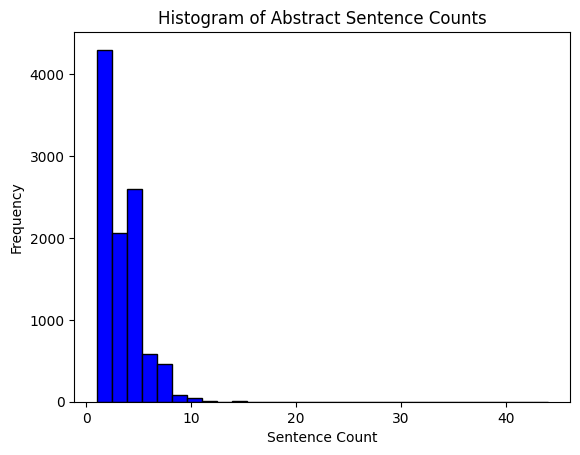

In [25]:
plt.hist(df_train['abstract_sent_count'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')
plt.title('Histogram of Abstract Sentence Counts')
plt.show()

In [26]:
df_train['abstract_sent_count'].describe()

count    10164.000000
mean         3.203168
std          1.964545
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         44.000000
Name: abstract_sent_count, dtype: float64

In [27]:
ecdf3 = ECDF(df_train['description_sent_count'])
ecdf4 = ECDF(df_train['abstract_sent_count'])

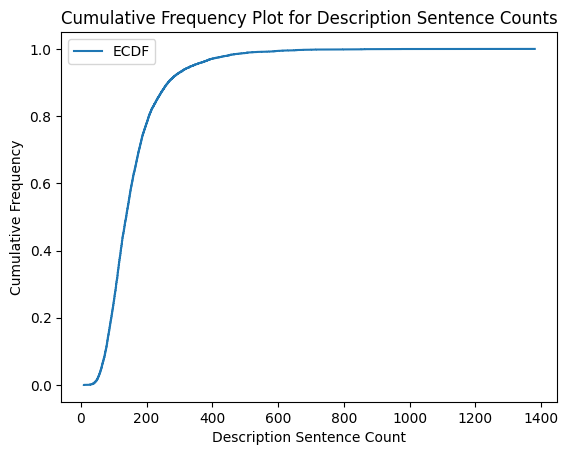

In [28]:
plt.step(ecdf3.x, ecdf3.y, label='ECDF')
plt.xlabel('Description Sentence Count')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Frequency Plot for Description Sentence Counts')
plt.legend()
plt.show()

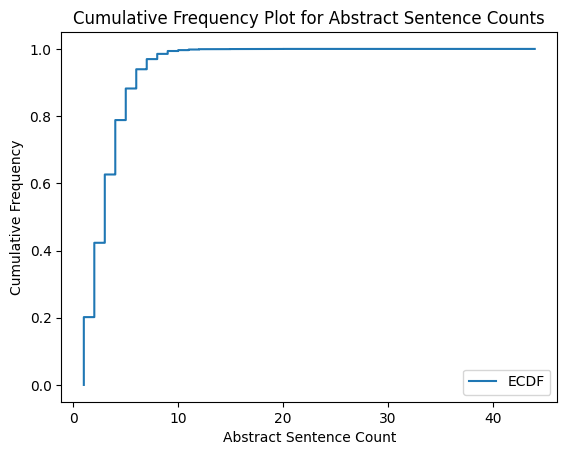

In [29]:
plt.step(ecdf4.x, ecdf4.y, label='ECDF')
plt.xlabel('Abstract Sentence Count')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Frequency Plot for Abstract Sentence Counts')
plt.legend()
plt.show()

In [30]:
df_train.head()

,description,abstract,description_word_count,abstract_word_count,description_sent_count,abstract_sent_count
0,BACKGROUND OF THE INVENTION \n This invent...,A method of forming fiber mixtures from differ...,3995,153,158,5
1,CROSS-REFERENCE TO RELATED APPLICATION \n ...,The fibers of recycled paper are cleaned by ag...,2712,96,119,4
2,This is a division of application Ser. No. 922...,"Non-woven, bias laid fabrics, where the variou...",6372,244,237,3
3,FIELD OF THE INVENTION \n The present inve...,Multiple-color air jet looms successively inse...,3885,153,133,5
4,[0001] This application claims the benefit...,A method of performing a spinning operation of...,3502,74,130,3


In [31]:
df_train['description'][0]

'BACKGROUND OF THE INVENTION \n     This invention relates to a method and apparatus for forming fiber mixtures from a plurality of fiber types by sequentially taking, from different fiber lots such as fiber bales, partial quantities which are small with respect to the entire quantity of the mixture. \n     German Laid-Open Applications (Offenlegungsschriften) Nos. 1,685,596 (to which corresponds U.S. Pat. No. 3,577,599) and 2,063,415 disclose a method according to which a plurality of fiber bales containing the same kind of fiber are positioned next to a plurality of fiber bales of another type of fiber. A carriage is moved past the fiber bales and the bale opener mounted thereon takes from each fiber type a partial quantity so that the composition of the partial quantities obtained during each pass has the desired predetermined mixture ratio. At the same time, care is taken that, in case the required individual partial quantity of one fiber type is not reached during the opening oper

In [32]:
df_train['abstract'][0]

'A method of forming fiber mixtures from different kinds of fiber includes the step of removing the fiber in a plurality of passes from a plurality of stored fiber lots containing the different kinds of fiber. During each pass, fiber is removed from consecutive stored fiber lots in partial quantities that are small relative to the entire fiber quantities in the stored fiber lots. According to the method, prior to fiber removal in the first pass, the entire fiber quantity in each stored fiber lot is separately determined and from such entire fiber quantity there is determined, for each stored fiber lot, a partial quantity to be removed from each stored fiber lot during the first pass. Each partial quantity represents a proportion of the entire fiber quantity of the respective stored fiber lot. Thereafter, at least during the first pass, the determined partial quantity is removed from the respective stored fiber lot.'

In [33]:
df_train['description'][1]

'CROSS-REFERENCE TO RELATED APPLICATION \n     This application is a continuation-in-part of the co-pending application of the same inventor, titled &#34;Method and Apparatus for Cleaning Fibers&#34;, filed May 15, 1989, under Ser. No. 351,384, issued on Dec. 11, 1990, as U.S. Pat. No. 4,976,822. \n    \n    \n     INFORMATION DISCLOSURE STATEMENT \n     It is well known in the art to recycle paper fibers by mechanically and chemically processing the paper into a slurry, and treating the slurry to remove ink, clay and other unwanted additives and contaminants. Conventional techniques including mechanical and chemical treatment, centrifuging, flotation, screening and the like will remove the greatest part of the unwanted material from the fibers, but the prior art techniques tend to leave a certain amount of ink and other contaminants on the fibers. As a result, the contaminants are present when the fibers are reused to make paper. \n     One technique utilized as a final step for remov

In [34]:
df_train['abstract'][1]

'The fibers of recycled paper are cleaned by agitating the slurry containing the fibers to maintain the fibers in suspension, and contacting the slurry with wash water to remove ink and other contaminants. The apparatus includes a passageway having screens forming opposite sides of the passageway. Agitators are within the passageway, and create enough turbulence to prevent fibers from settling or agglomerating. Channels adjacent to each screen carry wash water, and pump pressure creates a pressure differential across the screens to cause the wash water to contact the slurry and to be removed from the passageway.'

In [35]:
df_train['description'][2]

'This is a division of application Ser. No. 922,344, filed Oct. 23, 1986 now U.S. Pat. No. 4,877,470. \n    \n    \n     FIELD OF THE INVENTION \n     The present invention is directed to method and apparatus for forming bias laid, non-woven fabrics wherein, preferably, the yarns in at least two of the layers of fabric are laid at an angle of from 30° to 150° to the long axis of the fabric. In such fabrics, the yarns in the various layers are neither knitted, nor woven, but are held together by stitching through the layers, or by other external means, such as adhesive bonding. \n     THE PRIOR ART \n     The history of fabric formation is a long one. Most fabrics are made by the now traditional processes of knitting, weaving, etc., and sophisticated machinery has been developed for automatically manufacturing fabrics in accordance with these techniques. \n     For many modern usages, particularly in areas where structural strength and integrity are required, fabrics manufactured by the

In [36]:
df_train['abstract'][2]

'Non-woven, bias laid fabrics, where the various fabric layers are held together by external means, such as stitching, and wherein, preferably, at least two of the layers are formed at an angle of from 30° to 150° relative to the long axis of the fabric, are formed by directing at least two pluralities of yarns back and forth across the width of the forming fabric, to be wrapped around or mounted on a series of needles formed on a moving conveyor, one conveyor being placed on either side and moving in the direction of the long axis of the fabric. Speed of movement of the yarns can be determined by the speed of movement of the mechanism for the machine operated to hold the various fabric layers together; preferably said machine mechanism moves more slowly near the ends of each cycle, so that yarn carriers are similarly slowed at either end of the forming fabric width, aiding in making successive courses of yarn lie parallel to each other without the necessity for extra equipment. A seco

In [37]:
df_train['description'][3]

'FIELD OF THE INVENTION \n     The present invention relates to weft insertion in a multiple-color air jet loom, and more particularly to a method of and an apparatus for inserting a selected weft thread with a weft carrying force appropriate for the selected weft thread. \n     BACKGROUND OF THE INVENTION \n     Multiple-color air jet looms have a plurality of different kinds of weft threads in readiness for weft insertion and successively insert them, one at a time, through warp sheds according to a fabric to be woven on the loom. Such different weft threads typically vary in thickness. They are subjected to slightly different resistances to being drawn for weft insertion and are slightly differently carried on jets of air. \n     In prior multiple-color air jet looms, however, air under uniform pressure is ejected from groups of main nozzles and subnozzles irrespectively of the kind of selected weft thread to be inserted. This means that the weft carrying force remains constant at a

In [38]:
df_train['abstract'][3]

'Multiple-color air jet looms successively insert different kinds of weft threads into warp sheds to weave a fabric of desired construction. The different weft threads are subjected to different resistances to their being drawn through a main nozzle and are carried on air jets under different conditions, so that the weft threads will be inserted unstably at different speeds. With the arrangement of the invention, selected weft threads for insertion are carried, one at a time, through the warp shed under respective different weft carrying forces suited for the weft threads. The different weft carrying forces may be produced by varying pressures at which air is ejected, intervals of time during which air is ejected under pressure, or the manner in which subnozzles are positioned along the warp shed. There is provided a control means for changing the air pressures and ejection time intervals in synchronism with operation of the air jet loom.'

In [39]:
df_train['description'][4]

'[0001]     This application claims the benefit of Korean Applications No. P2003-51511 filed on Jul. 25, 2003, P2003-51512 filed on Jul. 25, 2003, and P2003-72247 filed on Oct. 16, 2003, which are hereby incorporated by reference.  \n       BACKGROUND OF THE INVENTION  \n       [0002]     1. Field of the Invention  \n         [0003]     The present invention relates to a washing machine, and more particularly, to a method of performing a spinning operation for a washing machine.  \n         [0004]     2. Discussion of the Related Art  \n         [0005]     Generally, a washing machine performs washing by executing a washing operation, a rinsing operation, and a spinning operation. The spinning operation includes a load pre-balancing cycle, a load weighing cycle, a load balancing cycle, and a main spinning cycle.  \n         [0006]     According to the principles of the related art, before the main spinning cycle, a microprocessor determines a load weight of wet clothes to measure spinn

In [40]:
df_train['abstract'][4]

'A method of performing a spinning operation of a washing machine is disclosed. First, a load weight of wet clothes contained in a tub is measured, and an optimal acceleration rate is calculated based upon the measured load weight. Finally, a rotational speed of the tub is gradually increased up to a predetermined speed at the calculated optimal acceleration rate such that the unbalanced distribution of the wet clothes within the tub is minimized.'